# Visualizations and Data Analysis for Model Performance

In [14]:
import joblib
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

import statsmodels.api as sm
import matplotlib.pyplot as plt

valid = pd.read_csv("validation_data.csv")

X_valid = valid.drop(columns=["User_ID", "Purchase"])
Y_valid = np.log(valid["Purchase"])

In [15]:
# Linear Model

lm = joblib.load("linear_model.pkl")

Y_lm = lm.predict(X_valid)

print("Linear Model RMSE: ", np.sqrt(mse(Y_valid, Y_lm)))
print("Linear Model R2: ", r2_score(Y_valid, Y_lm))

Linear Model RMSE:  1.660081104885919
Linear Model R2:  0.38142769703748014


/home/vincentw/.local/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.4.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [16]:
# Random Forest

rf = joblib.load('random_forest_model.pkl')

Y_rf = rf.predict(X_valid)

print("Random Forest RMSE: ", np.sqrt(mse(Y_valid, Y_rf)))
print("Random Forest R2: ", r2_score(Y_valid, Y_rf))

Random Forest RMSE:  0.948364497933683
Random Forest R2:  0.7981250496246821


/home/vincentw/.local/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.4.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/vincentw/.local/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.4.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [17]:
# MLP

mlp = joblib.load('mlp_model.pkl')

Y_mlp = mlp.predict(X_valid)

print("MLP RMSE: ", np.sqrt(mse(Y_valid, Y_mlp)))
print("MLP R2: ", r2_score(Y_valid, Y_mlp))

MLP RMSE:  0.961793667148887
MLP R2:  0.7923673323869173


/home/vincentw/.local/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MLPRegressor from version 1.4.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


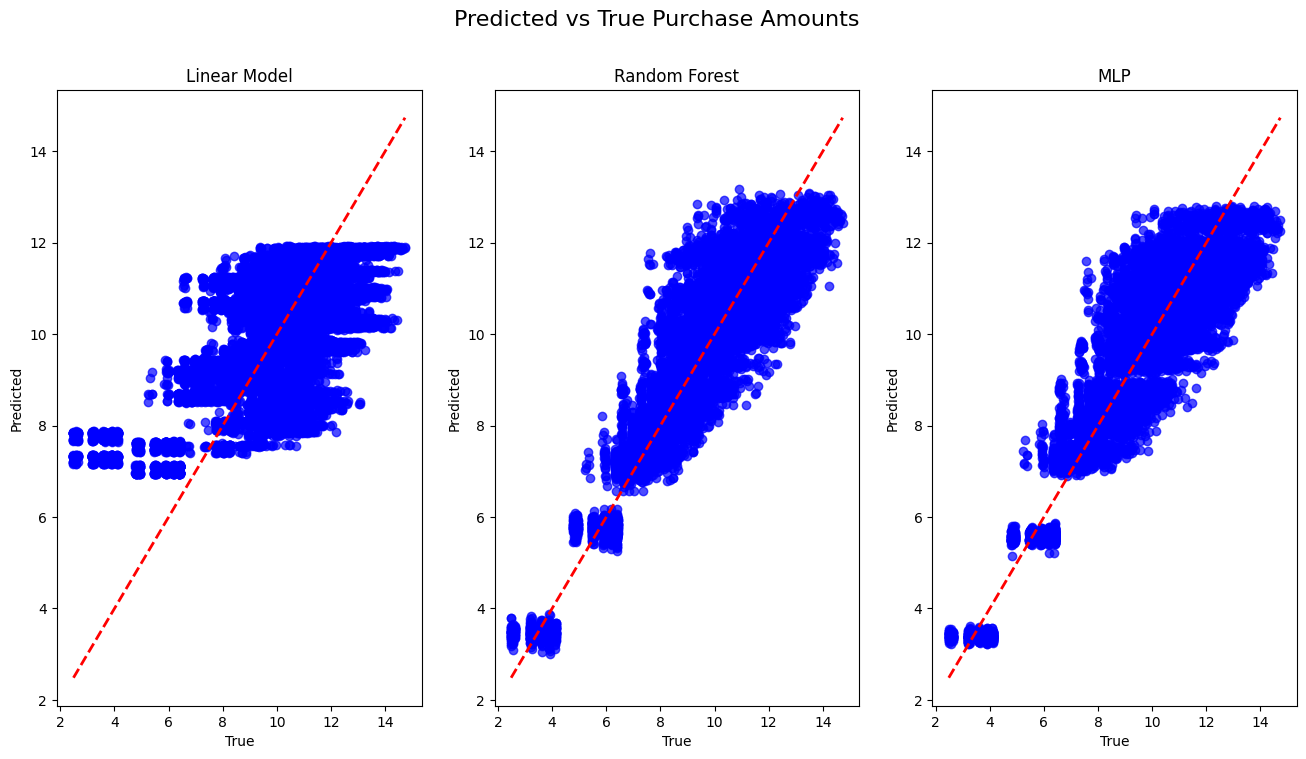

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

for i in range(3):
    y_test = Y_valid
    y_pred = [Y_lm, Y_rf, Y_mlp][i]
    ax[i].scatter(y_test, y_pred, color='blue', alpha=0.7)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax[i].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)
    ax[i].set_xlabel('True')
    ax[i].set_ylabel('Predicted')
    ax[i].set_title(['Linear Model', 'Random Forest', 'MLP'][i])
    
fig.suptitle('Predicted vs True Purchase Amounts', fontsize=16)
plt.show()

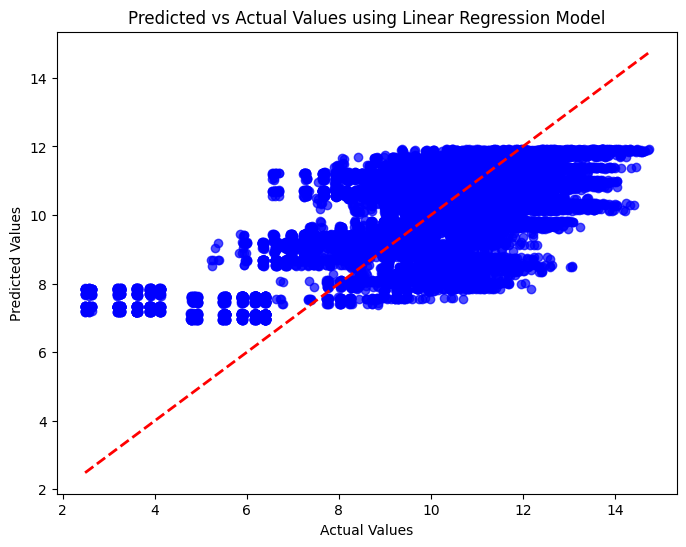

In [19]:
y_test = Y_valid
y_pred = Y_lm
model = "Linear Regression Model"

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values using {}'.format(model))

# Add a diagonal line to show the perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.show()

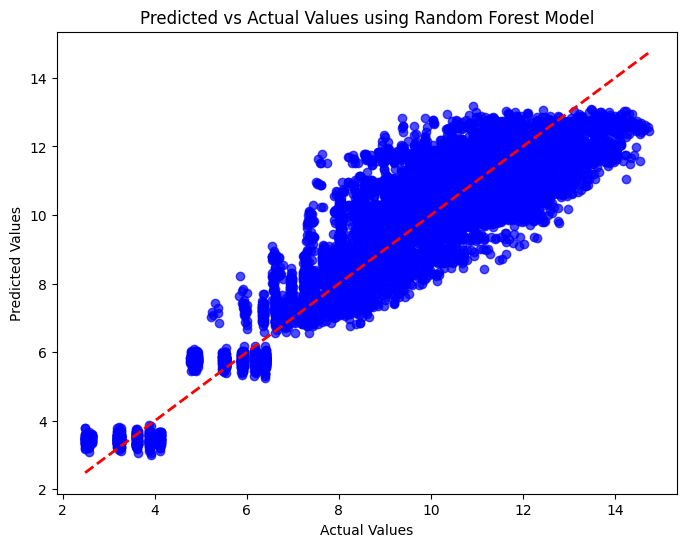

In [20]:
y_test = Y_valid
y_pred = Y_rf
model = "Random Forest Model"

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values using {}'.format(model))

# Add a diagonal line to show the perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.show()

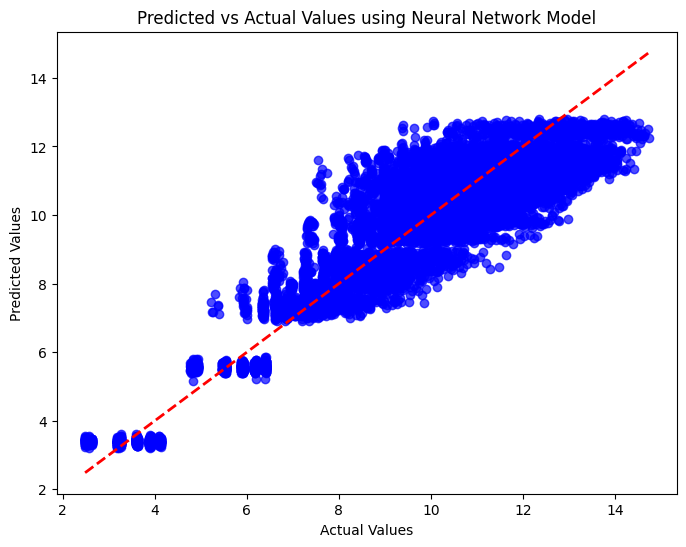

In [21]:
y_test = Y_valid
y_pred = Y_mlp
model = "Neural Network Model"

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values using {}'.format(model))

# Add a diagonal line to show the perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.show()

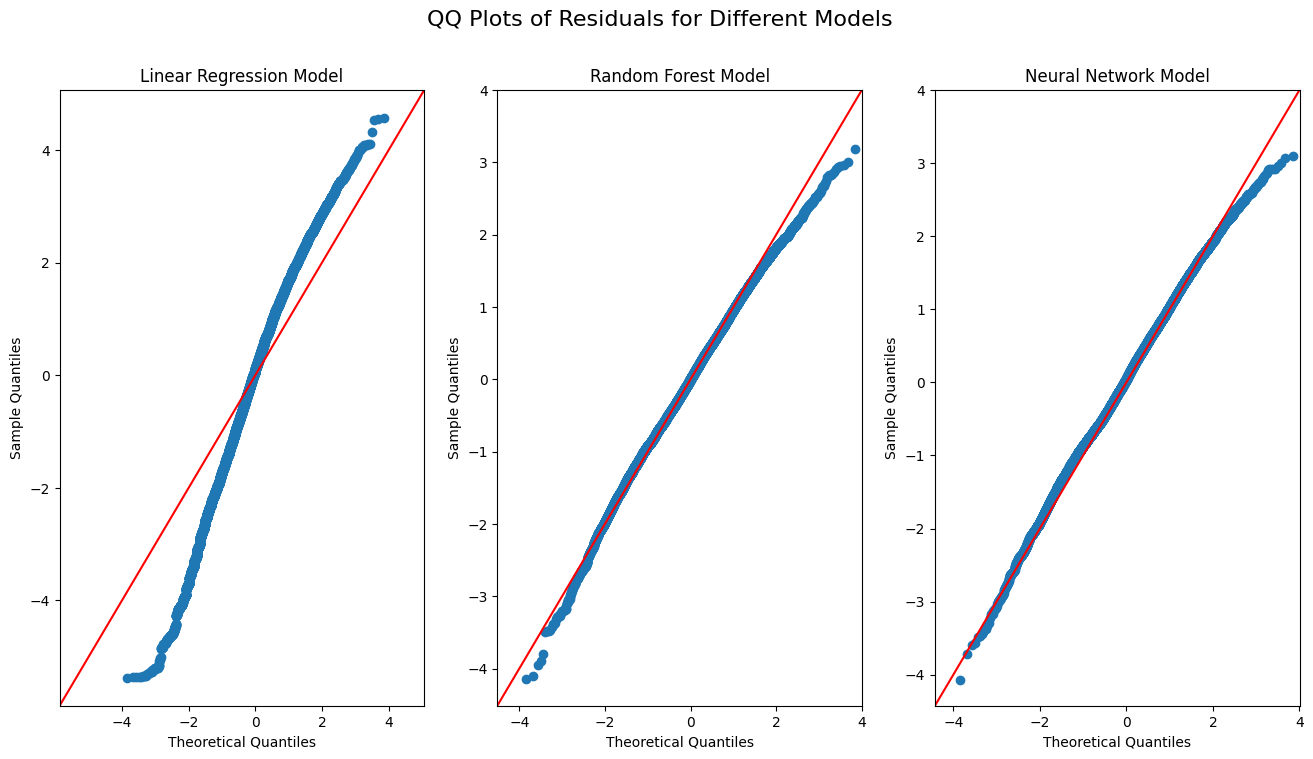

In [22]:
fig, axes = plt.subplots(1,3, figsize=(16, 8))


lm_residuals = Y_valid - Y_lm
rf_residuals = Y_valid - Y_rf
mlp_residuals = Y_valid - Y_mlp

# Create the QQ plot with statsmodels
sm.qqplot(lm_residuals, line='45', ax=axes[0])
axes[0].set_title("Linear Regression Model")
sm.qqplot(rf_residuals, line='45', ax=axes[1])
axes[1].set_title("Random Forest Model")
sm.qqplot(mlp_residuals, line='45', ax=axes[2])
axes[2].set_title("Neural Network Model")
fig.suptitle("QQ Plots of Residuals for Different Models", fontsize=16)
plt.show()

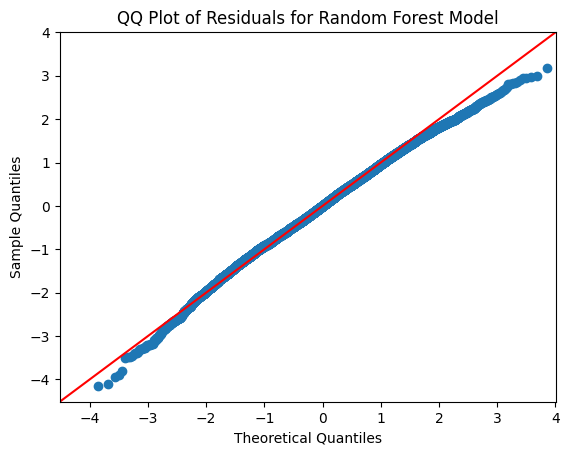

In [23]:
rf_residuals = Y_valid - Y_rf

# Create the QQ plot with statsmodels
fig = sm.qqplot(rf_residuals, line='45')
plt.title("QQ Plot of Residuals for Random Forest Model")
plt.show()

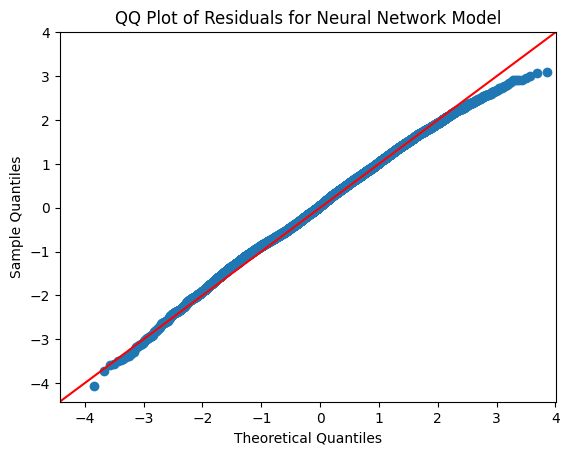

In [24]:
mlp_residuals = Y_valid - Y_mlp

# Create the QQ plot with statsmodels
fig = sm.qqplot(mlp_residuals, line='45')
plt.title("QQ Plot of Residuals for Neural Network Model")
plt.show()

Linear Model RMSE:  1.660081104885919
Linear Model R2:  0.38142769703748014
Random Forest RMSE:  0.948364497933683
Random Forest R2:  0.7981250496246821
MLP RMSE:  0.961793667148887
MLP R2:  0.7923673323869173


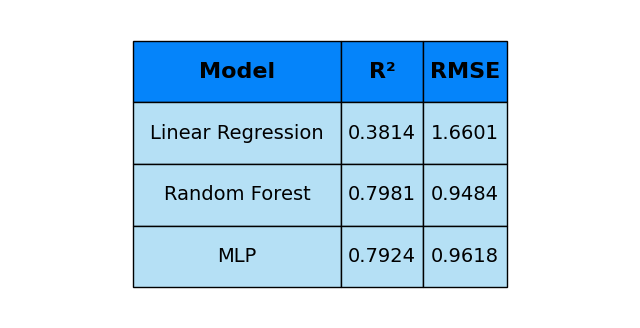

In [25]:

lm_rmse = np.sqrt(mse(Y_valid, Y_lm))
lm_r2score = r2_score(Y_valid, Y_lm)
print("Linear Model RMSE: ", lm_rmse)
print("Linear Model R2: ", lm_r2score)

rf_rmse = np.sqrt(mse(Y_valid, Y_rf))
rf_r2score = r2_score(Y_valid, Y_rf)
print("Random Forest RMSE: ", rf_rmse)
print("Random Forest R2: ", rf_r2score)

mlp_rmse = np.sqrt(mse(Y_valid, Y_mlp))
mlp_r2score = r2_score(Y_valid, Y_mlp)
print("MLP RMSE: ", mlp_rmse)
print("MLP R2: ", mlp_r2score)


data = {
    "Model": ["Linear Regression", "Random Forest", "MLP"],
    "R²": [lm_r2score, rf_r2score, mlp_r2score],
    "RMSE": [lm_rmse, rf_rmse, mlp_rmse]
}

df = pd.DataFrame(data)
df = df.round(4).astype(str)

fig, ax = plt.subplots(figsize=(8, 4))  # Increased figure size for bigger grid cells
ax.axis('tight')
ax.axis('off')

# Create table with larger grid
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', colColours=["#FFDDC1", "#B4E1FF", "#D4A5A5"])

# Style adjustments
table.auto_set_font_size(False)
table.set_fontsize(14)  # Larger text size
table.auto_set_column_width([0, 1, 2])  # Adjust column widths

# Make header bold and bigger
for key, cell in table.get_celld().items():
    cell.set_height(0.2)  # Increase row height for larger grid
    cell.set_fontsize(16) if key[0] == 0 else cell.set_fontsize(14)  # Make headers slightly bigger
    if key[0] == 0:  # Header row
        cell.set_text_props(weight='bold', color="black")
        cell.set_facecolor("#0584fa")  # Golden Yellow Header
    else:
        cell.set_facecolor("#b5e0f5")  # Soft background for readability

# Display the styled table
plt.show()

# Final testing results for best Model

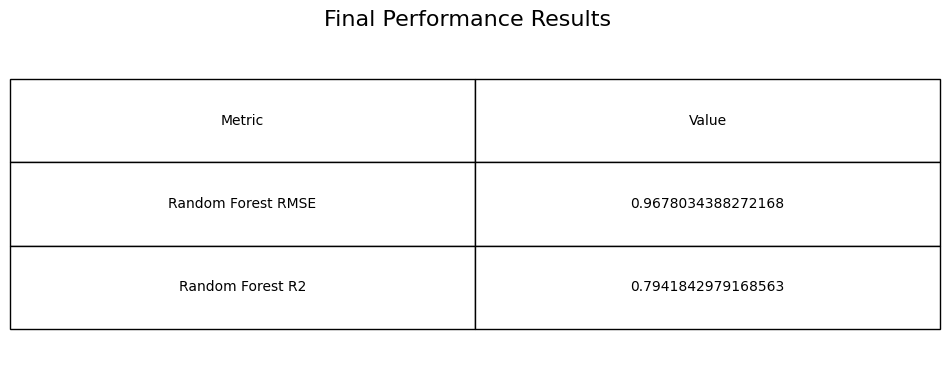

In [27]:
test = pd.read_csv("test_data.csv")

X_test = test.drop(columns=["User_ID", "Purchase"])
Y_test = np.log(test["Purchase"])

Y_rf = rf.predict(X_test)

Data_Table = [
    ["Random Forest RMSE", np.sqrt(mse(Y_test, Y_rf))],
    ["Random Forest R2", r2_score(Y_test, Y_rf)]
]

fig, ax = plt.subplots(figsize=(6, 4))
# ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=Data_Table, loc='center', colLabels=["Metric", "Value"], cellLoc='center')

table.scale(2, 5)

fig.suptitle("Final Performance Results", fontsize=16)

# plt.tight_layout()
plt.show()